## Problem Statement1

**In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0**

In [1]:
import pandas as pd
with open("nba_2013.csv") as csvfile:
    nba = pd.read_csv(csvfile)

In [9]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [6]:
nba.columns.values

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

In [8]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [16]:
#filling null values with mean
nba['fg.'].fillna(nba['fg.'].mean(),inplace = True)
nba['x2p.'].fillna(nba['x2p.'].mean(),inplace = True)
nba['efg.'].fillna(nba['efg.'].mean(),inplace = True)
nba['x3p.'].fillna(nba['x3p.'].mean(),inplace = True)
nba['ft.'].fillna(nba['ft.'].mean(),inplace = True)

In [19]:
#numeric columns
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[distance_columns]

In [20]:
nba_normalized = nba_numeric.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [22]:
nba_normalized.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.285111,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.285111,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494


In [23]:
#categorical columns
nba_category = nba[['player','bref_team_id','season']]

In [24]:
nba = pd.concat([nba_category,nba_normalized],axis = 1)

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X = nba_normalized.drop(['pts'],axis = 1)

In [30]:
y = nba['pts']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [39]:
#check for value which has the highest regression value
for k in range(10):
    k_value = k+1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("Regression Score is : ",format(metrics.r2_score(y_test,y_pred),'.4f'),'for k values :',k_value)

Regression Score is :  0.9145 for k values : 1
Regression Score is :  0.9464 for k values : 2
Regression Score is :  0.9548 for k values : 3
Regression Score is :  0.9594 for k values : 4
Regression Score is :  0.9583 for k values : 5
Regression Score is :  0.9579 for k values : 6
Regression Score is :  0.9579 for k values : 7
Regression Score is :  0.9609 for k values : 8
Regression Score is :  0.9576 for k values : 9
Regression Score is :  0.9557 for k values : 10


In [40]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression score is: 0.9609


In [45]:
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
Test_With_Predicted

,Actual Points,Predicted Points
0,0.168145,0.125723
1,0.276514,0.297243
2,0.422676,0.363189
3,0.007327,0.011088
4,0.381026,0.373939
...,...,...
140,0.426919,0.421664
141,0.013498,0.019379
142,0.312379,0.303943
143,0.306980,0.273766


## Problem Statement 2

# In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.
**Hint:
from bs4 import BeautifulSoup
import urllib.request
import nltk**

**response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")**

In [46]:
from bs4 import BeautifulSoup
import urllib.request
import nltk

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [55]:
text = soup.get_text(strip=True) 

In [73]:
tokens = [t for t in text.split()]

In [78]:
words = []
for word in tokens:
    words.append(word.lower())
words[:5]

['php:',
 'hypertext',
 'preprocessordownloadsdocumentationget',
 'involvedhelpgetting',
 'startedintroductiona']

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords[:5]

['i', 'me', 'my', 'myself', 'we']

In [82]:
print("Total including stopwords:", len(words))
clean_words = []
for w in words:
    if w not in stopWords:
        clean_words.append(w)
    
print("Length after stopwords:", len(clean_words) )
print("Total removed stopwords:", len(words)-len(clean_words) )
clean_words[:10]

Total including stopwords: 2426
Length after stopwords: 1654
Total removed stopwords: 772


['php:',
 'hypertext',
 'preprocessordownloadsdocumentationget',
 'involvedhelpgetting',
 'startedintroductiona',
 'simple',
 'tutoriallanguage',
 'referencebasic',
 'syntaxtypesvariablesconstantsexpressionsoperatorscontrol',
 'structuresfunctionsclasses']

In [84]:
counts  = nltk.FreqDist(clean_words)
print(counts.most_common(10))

[('php', 111), ('release', 60), ('found', 43), ('source', 42), ('2020php', 25), ('team', 25), ('downloads', 25), ('please', 25), ('visit', 25), ('list', 25)]


In [85]:
print(counts.max())

php


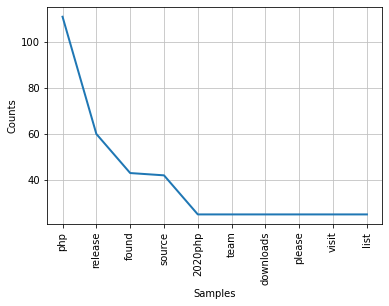

In [87]:
counts.plot(10, cumulative=False)

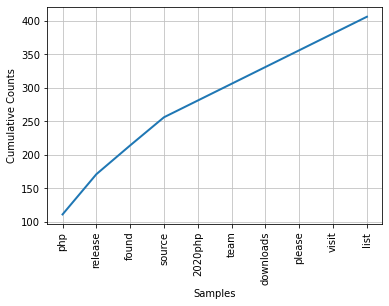

In [88]:
counts.plot(10, cumulative=True)